In [3]:
from keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

/home/it-dog/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# ------- Run this few lines -------

In [41]:
url = 'sad.jpg'

In [33]:
import mycodes.emotionpred
import mycodes.genderpred

/home/it-dog/anaconda3/lib/python3.6/site-packages/keras/models.py:291: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [53]:
i = cv2.imread(url)
print(emotionof(i))
print(genderof(i))

('sad', 0.99961346)
('man', 1.0)


# -------------------------------------

In [45]:
img.shape

(390, 520, 3)

In [46]:
img = cv2.resize(img,(64,64))

In [24]:
img = img.mean(axis=2,keepdims=True)  # rgb to grayscale

In [47]:
img.shape

(64, 64, 3)

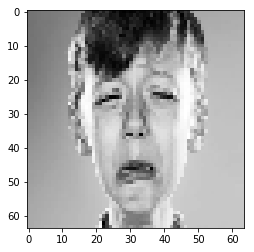

In [26]:
plt.imshow(np.squeeze(img),cmap='gray')

In [48]:
x = np.expand_dims(img,0)  # expand (48,48,1) to (1,48,48,1)

In [99]:
y_pred = model.predict(x)

In [100]:
labels = {0:'angry',1:'disgust',2:'sad',3:'happy',4:'sad',5:'surprise',6:'neutral'}

In [101]:
label = np.argmax(y_pred)
confidence = np.amax(y_pred)
print("Predicted label is '%s' with %f confidence." % (labels[label],confidence))

Predicted label is 'sad' with 1.000000 confidence.
